<a href="https://colab.research.google.com/github/youngjon2001/Physicochemical-Determinants-of-Protein-Structural-Deviation/blob/main/Tertiary_protein_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# import the dataset from the site
df = pd.read_csv('/content/drive/MyDrive/protein.csv')
print(df)

         RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7   F8       F9  
0      4287.87  102 

# EDA

In [37]:
# checking for dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [38]:
# checking for columns
df.columns

# removing spaces from columns
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], dtype='object')


In [39]:
# checking for null values
df.isnull().sum()

,0
RMSD,0
F1,0
F2,0
F3,0
F4,0
F5,0
F6,0
F7,0
F8,0
F9,0


In [40]:
# descriptive statistics
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [41]:
# size of the data

df.shape

(45730, 10)

# CORRELATION ANALYSIS

In [42]:
# correlation analysis using heatmap
df.corr()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
RMSD,1.000000,-0.015087,0.156895,0.374309,-0.169771,-0.013982,-0.036135,-0.003339,0.000344,0.062830
F1,-0.015087,1.000000,0.906606,0.126285,0.931056,0.998185,0.967531,0.554002,0.651251,-0.898240
F2,0.156895,0.906606,1.000000,0.502562,0.793143,0.902853,0.908354,0.515929,0.584242,-0.786188
F3,0.374309,0.126285,0.502562,1.000000,0.031230,0.122622,0.200650,0.080064,0.095340,-0.069039
F4,-0.169771,0.931056,0.793143,0.031230,1.000000,0.925707,0.938108,0.485185,0.676919,-0.891766
F5,-0.013982,0.998185,0.902853,0.122622,0.925707,1.000000,0.961769,0.553729,0.642961,-0.897765
F6,-0.036135,0.967531,0.908354,0.200650,0.938108,0.961769,1.000000,0.538198,0.662584,-0.881973
F7,-0.003339,0.554002,0.515929,0.080064,0.485185,0.553729,0.538198,1.000000,0.347030,-0.521148
F8,0.000344,0.651251,0.584242,0.095340,0.676919,0.642961,0.662584,0.347030,1.000000,-0.637287
F9,0.062830,-0.898240,-0.786188,-0.069039,-0.891766,-0.897765,-0.881973,-0.521148,-0.637287,1.000000


<Axes: >

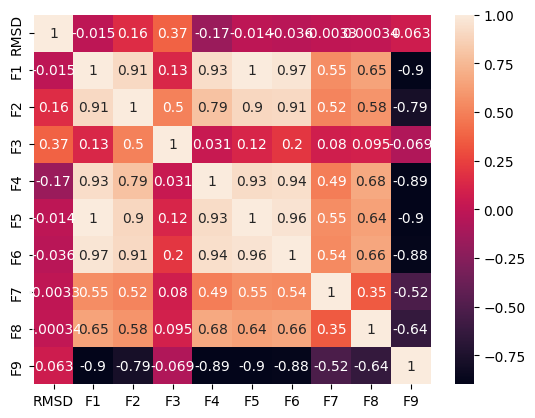

In [43]:
# heatmap correlation
sns.heatmap(df.corr(), annot=True)

### Heatmap Interpretation

*   **Strong Positive Correlations**: `F1`, `F2`, `F4`, `F5`, `F6` are all highly positively correlated with each other (values generally above 0.7-0.9). This suggests they might be measuring similar aspects or are influenced by common underlying factors.
*   **Strong Negative Correlations**: `F9` shows strong negative correlations with `F1`, `F2`, `F4`, `F5`, `F6`, `F7`, and `F8`. This means as values in these features increase, `F9` tends to decrease, and vice-versa.
*   **Weak/No Correlation with RMSD**: The `RMSD` feature shows very weak correlations with most other features (values close to 0), except for `F2` (0.156895) and `F3` (0.374309), which have a moderate positive correlation.
*   **Moderate Correlations**: `F3` has moderate positive correlations with `F2` and `F6`, but weak correlations with `F1`, `F4`, `F5`, `F7`, and `F8`.

In summary, the heatmap highlights strong relationships between many of the 'F' features, particularly among `F1` through `F6` (excluding `F3` to some extent) and their inverse relationship with `F9`. The `RMSD` feature appears to be largely independent of most other features, with only a mild positive relationship with `F3` and `F2`.

#TARGET VARIABLE ANALYSIS

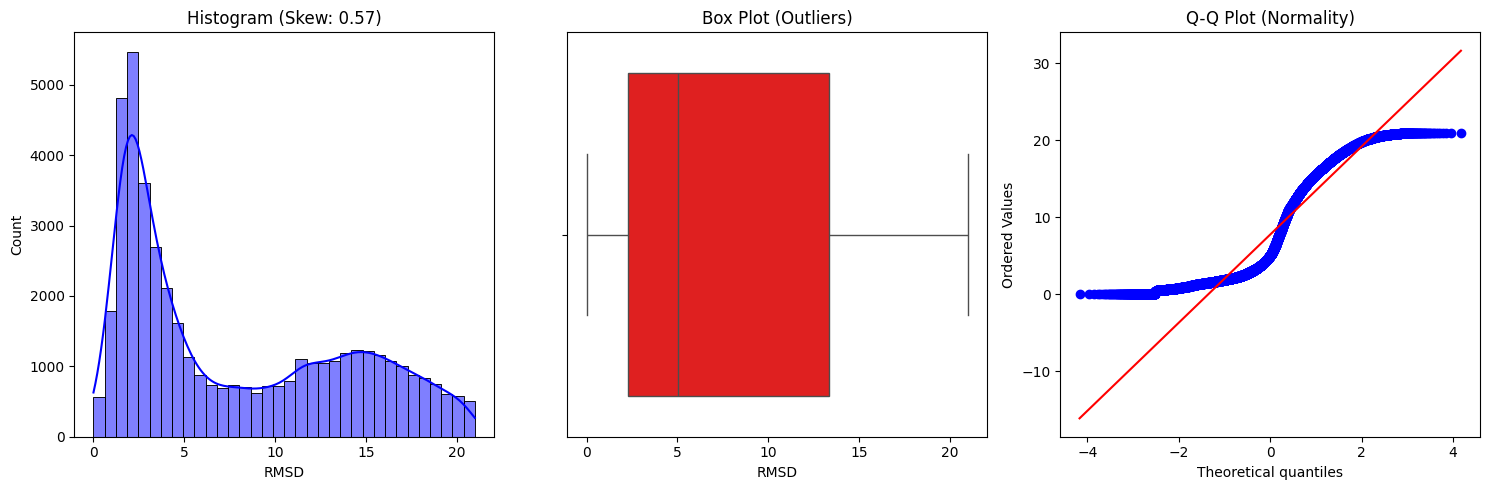

In [44]:
import scipy.stats as stats

target = df['RMSD']

plt.figure(figsize=(15, 5))

# 2. Histogram & KDE (Check for Skewness)
plt.subplot(1, 3, 1)
sns.histplot(target, kde=True, color='blue')
plt.title(f'Histogram (Skew: {target.skew():.2f})')

# 3. Box Plot (Check for Outliers)
plt.subplot(1, 3, 2)
sns.boxplot(x=target, color='red')
plt.title('Box Plot (Outliers)')

# 4. Q-Q Plot (Check for Normality)
plt.subplot(1, 3, 3)
stats.probplot(target, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality)')

plt.tight_layout()
plt.show()

##Target analysis interpretation

Histogram and KDE Plot: This plot clearly shows that the RMSD distribution is positively skewed. This means there's a longer tail on the right side of the distribution, indicating that there are more data points with lower RMSD values, and fewer data points with higher RMSD values. The peak of the distribution is towards the lower end.

Box Plot: The box plot reinforces the observation of skewness and also highlights the presence of outliers. The box itself, representing the interquartile range (IQR), is shifted towards the lower values. The median (the line inside the box) is also at a lower RMSD value. The 'whiskers' extend to the non-outlier data, but you can see many individual points beyond the upper whisker, which are identified as outliers. These outliers are high RMSD values.

Q-Q Plot: The Quantile-Quantile (Q-Q) plot assesses the normality of the RMSD distribution. If the data were normally distributed, the points would closely follow the straight diagonal line. However, in this plot, the points deviate significantly from the line, particularly at the tails. This confirms that the RMSD variable is not normally distributed.



# Univariant analysis for feature analysis


--- Analyzing Feature: RMSD ---
count    45730.000000
mean         7.748528
std          6.118312
min          0.000000
25%          2.305000
50%          5.030000
75%         13.379000
max         20.999000
Name: RMSD, dtype: float64
Skewness: 0.57


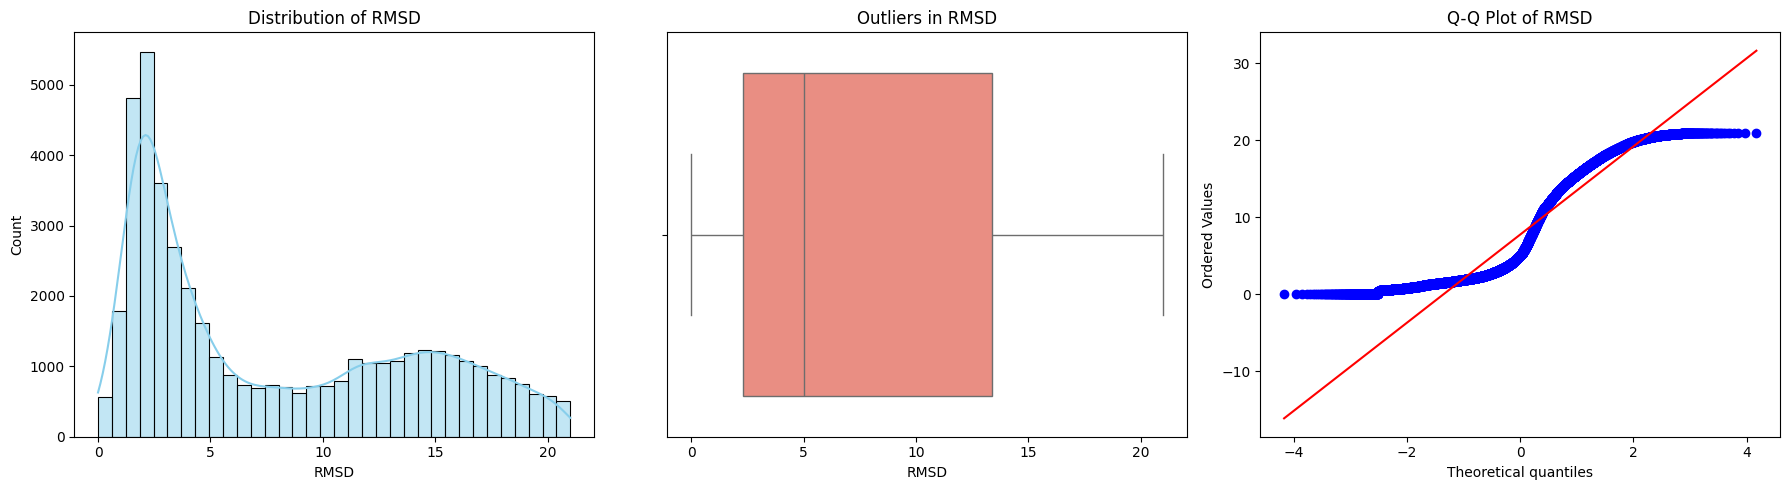


--- Analyzing Feature: F1 ---
count    45730.000000
mean      9871.596995
std       4058.138034
min       2392.050000
25%       6936.680000
50%       8898.805000
75%      12126.150000
max      40034.900000
Name: F1, dtype: float64
Skewness: 1.09


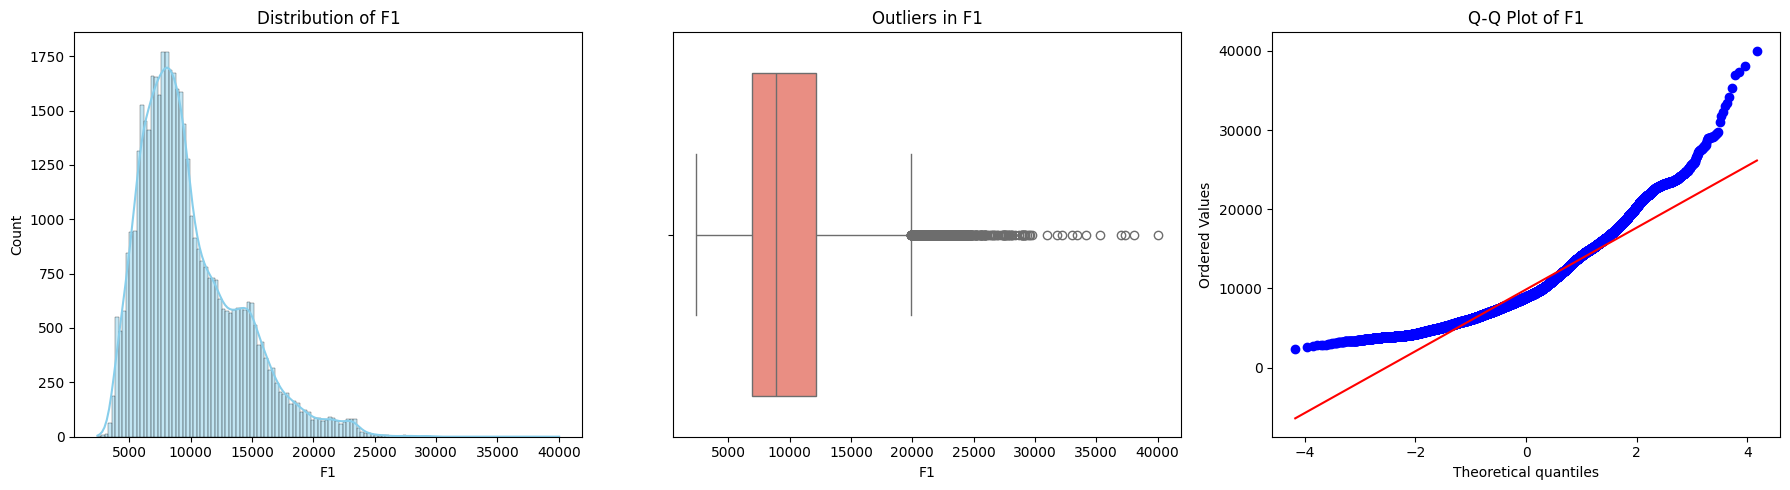


--- Analyzing Feature: F2 ---
count    45730.000000
mean      3017.367175
std       1464.324663
min        403.500000
25%       1979.045000
50%       2668.155000
75%       3786.410000
max      15312.000000
Name: F2, dtype: float64
Skewness: 1.19


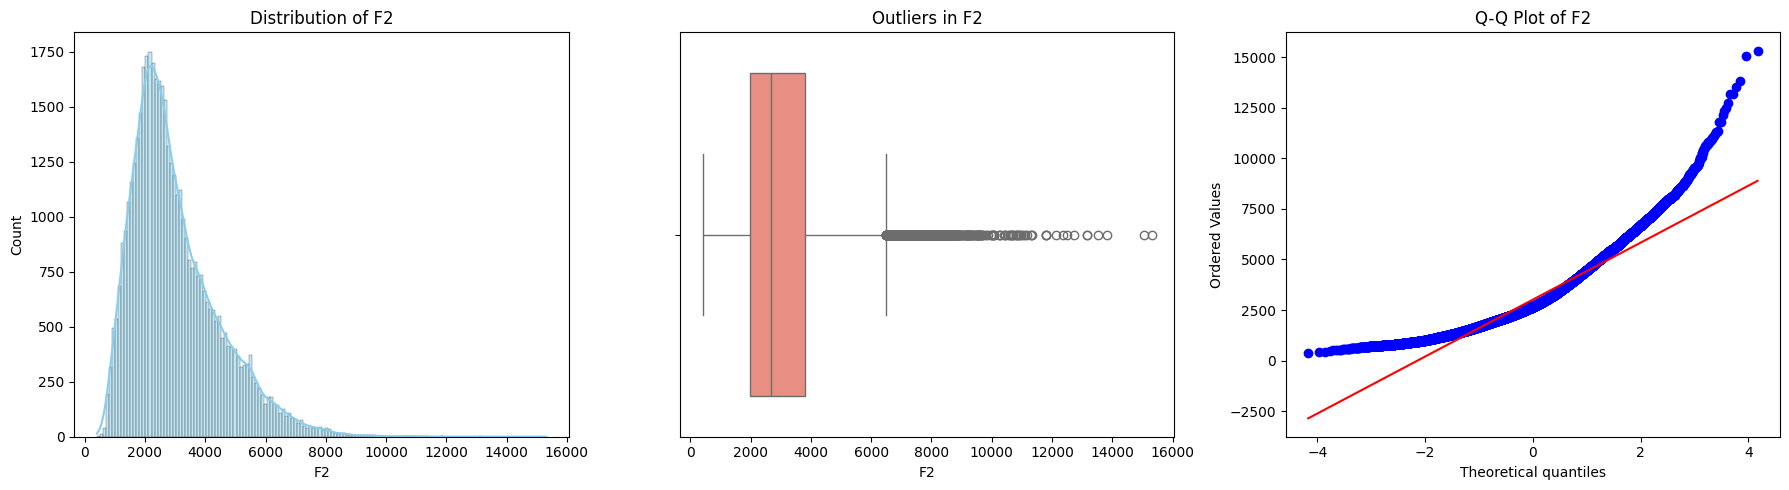


--- Analyzing Feature: F3 ---
count    45730.000000
mean         0.302392
std          0.062886
min          0.092500
25%          0.258740
50%          0.300150
75%          0.342890
max          0.577690
Name: F3, dtype: float64
Skewness: 0.24


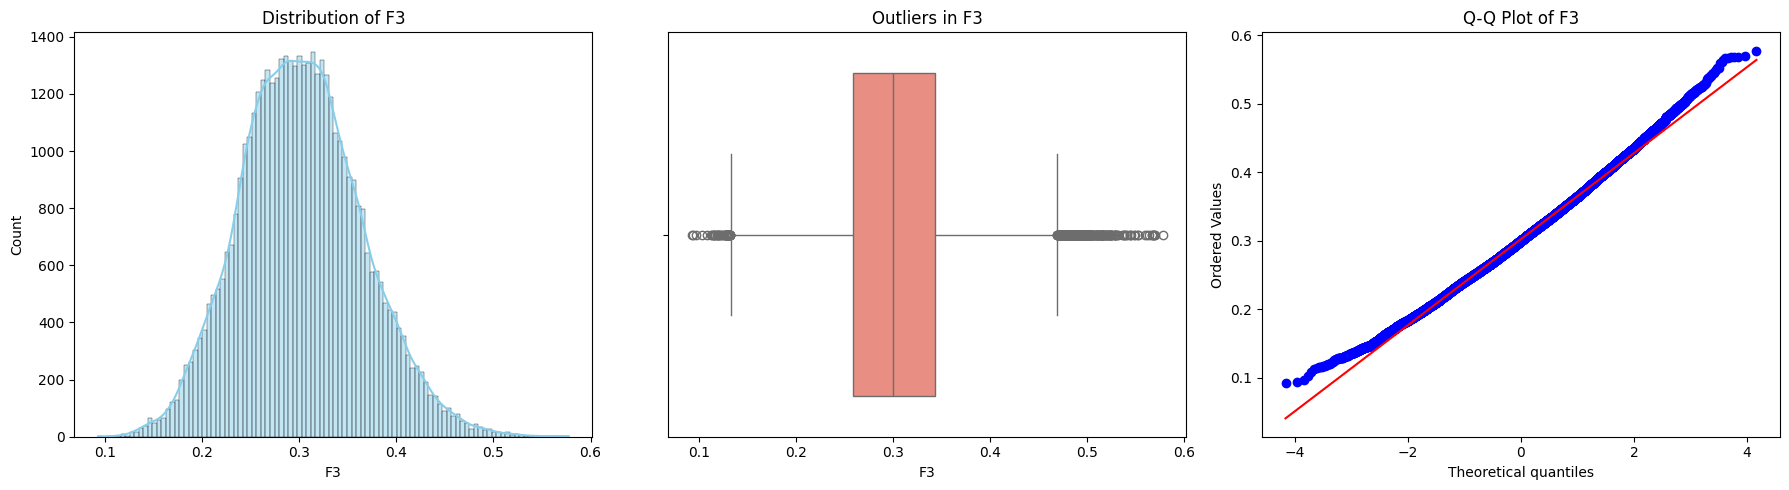


--- Analyzing Feature: F4 ---
count    45730.000000
mean       103.492433
std         55.424985
min         10.310100
25%         63.563900
50%         87.740800
75%        133.646750
max        369.317000
Name: F4, dtype: float64
Skewness: 1.23


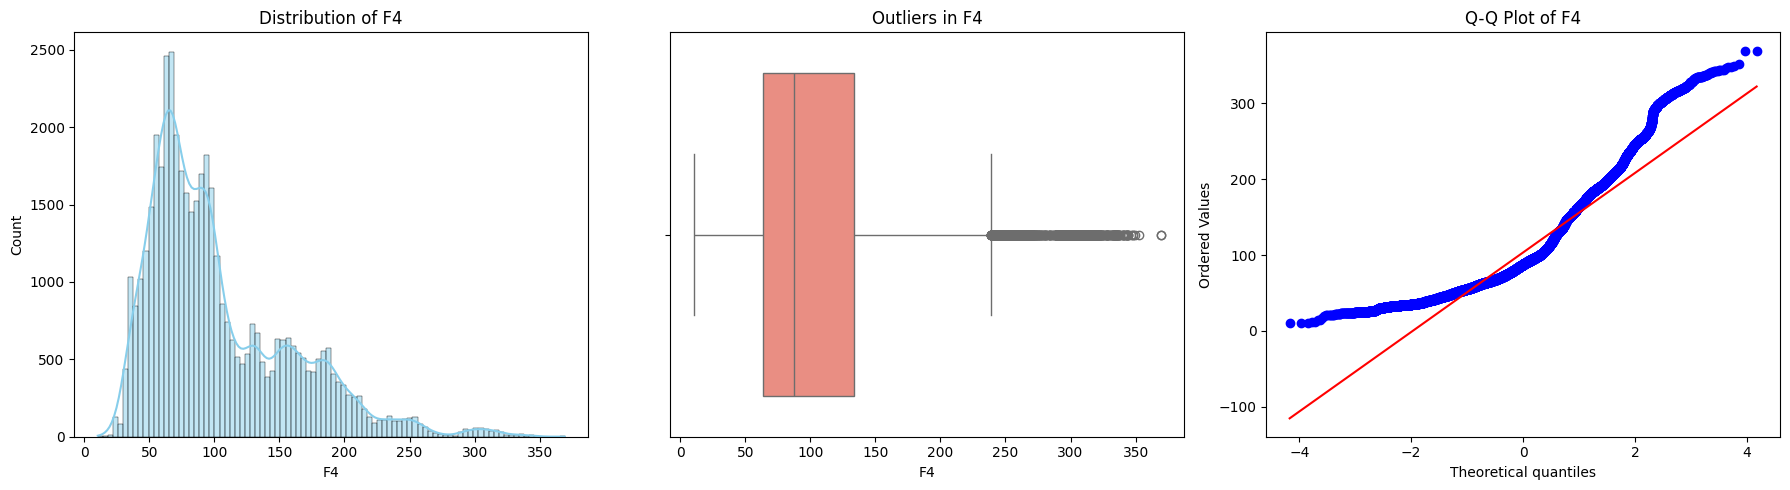


--- Analyzing Feature: F5 ---
count    4.573000e+04
mean     1.368299e+06
std      5.640367e+05
min      3.194902e+05
25%      9.535912e+05
50%      1.237219e+06
75%      1.690920e+06
max      5.472011e+06
Name: F5, dtype: float64
Skewness: 1.06


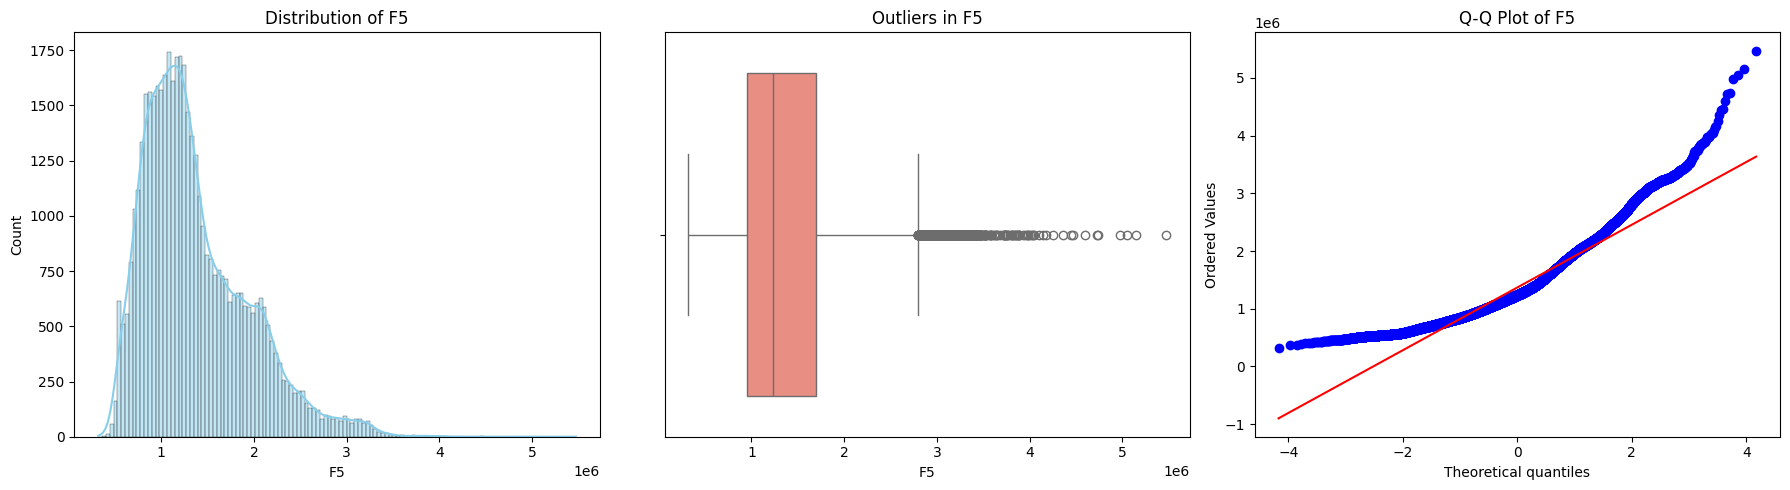


--- Analyzing Feature: F6 ---
count    45730.000000
mean       145.638061
std         69.999230
min         31.970400
25%         94.757500
50%        126.176000
75%        181.468500
max        598.408000
Name: F6, dtype: float64
Skewness: 1.12


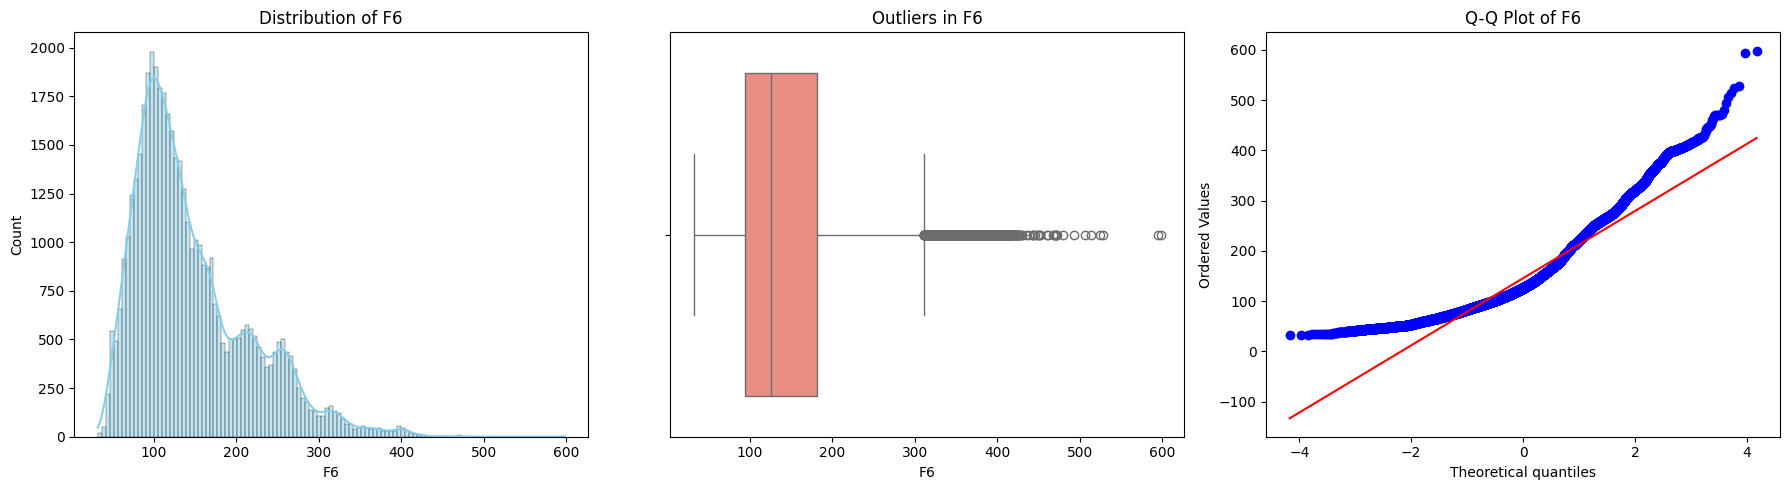


--- Analyzing Feature: F7 ---
count     45730.000000
mean       3989.755990
std        1993.574575
min           0.000000
25%        3165.322500
50%        3840.170000
75%        4644.192500
max      105948.170000
Name: F7, dtype: float64
Skewness: 20.76


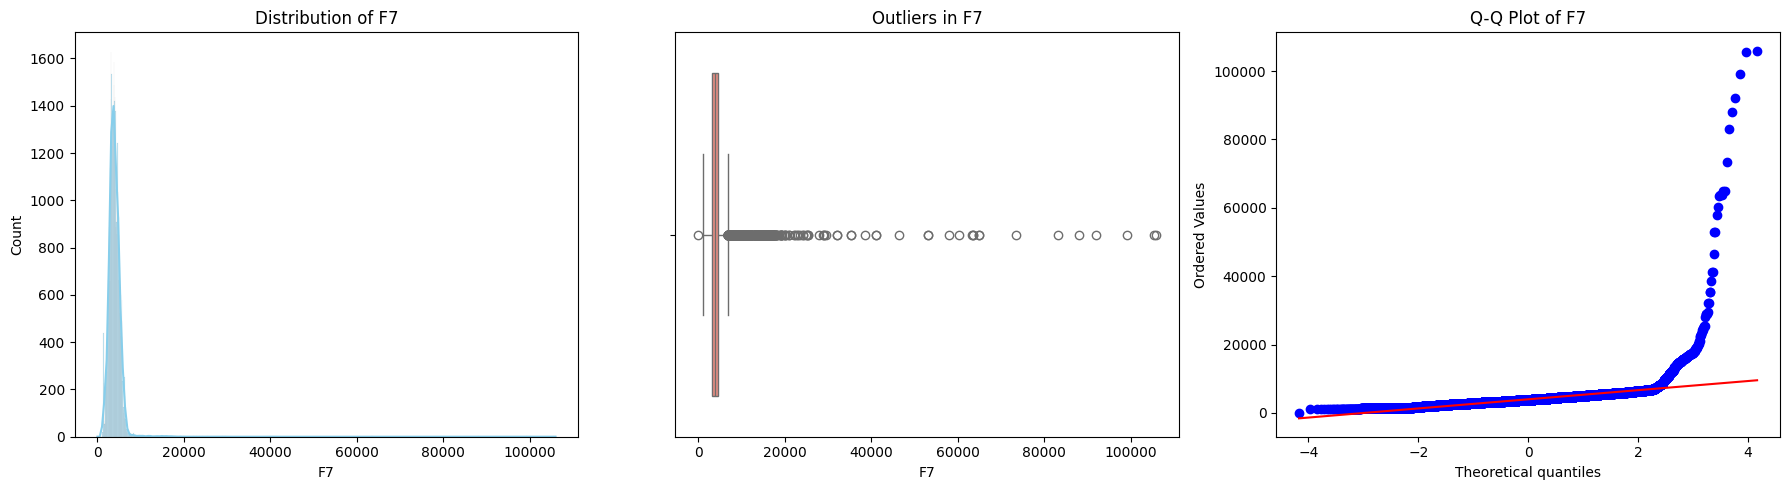


--- Analyzing Feature: F8 ---
count    45730.000000
mean        69.975071
std         56.493443
min          0.000000
25%         31.000000
50%         54.000000
75%         91.000000
max        350.000000
Name: F8, dtype: float64
Skewness: 1.68


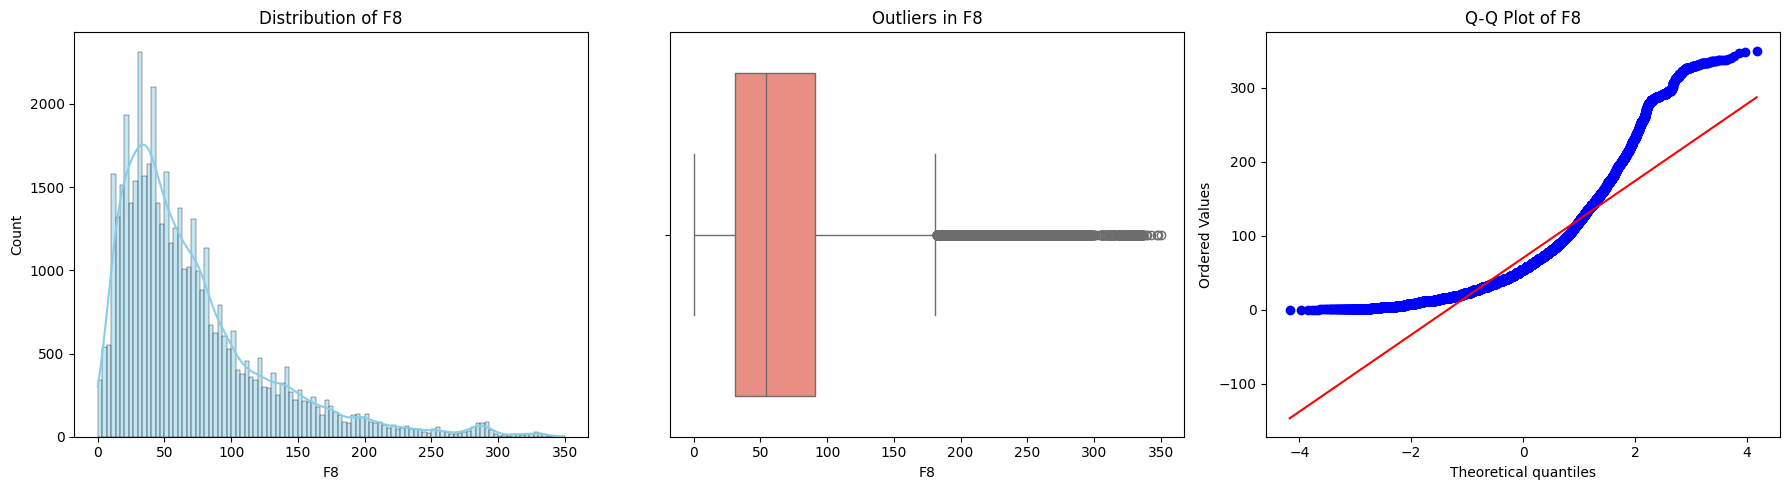


--- Analyzing Feature: F9 ---
count    45730.000000
mean        34.523664
std          5.979755
min         15.228000
25%         30.424725
50%         35.299300
75%         38.870800
max         55.300900
Name: F9, dtype: float64
Skewness: -0.47


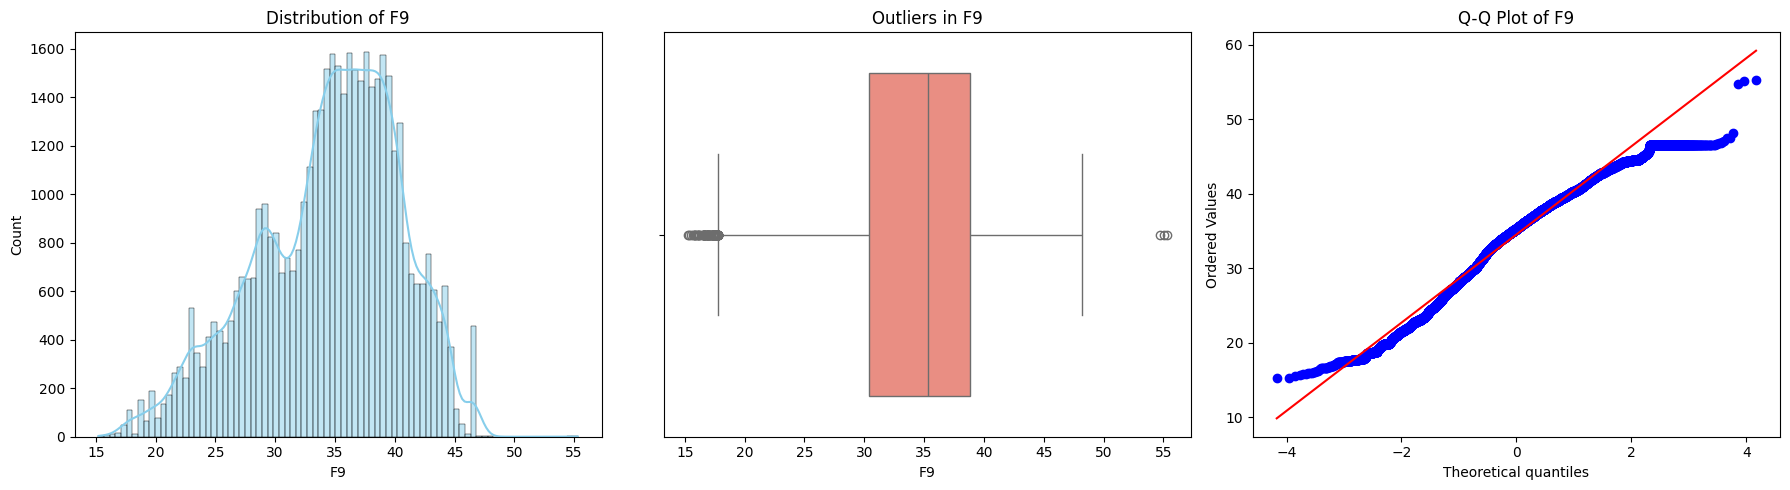

In [45]:
# 1. Load your dataset
df = pd.read_csv('/content/drive/MyDrive/protein.csv')

# 2. Specify numeric columns (RMSD + F1-F9)
numeric_cols = ['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

# 3. Loop through each numeric column to analyze
for col in numeric_cols:
    print(f"\n--- Analyzing Feature: {col} ---")

    # Statistical Summary
    stats_summary = df[col].describe()
    skewness = df[col].skew()
    print(stats_summary)
    print(f"Skewness: {skewness:.2f}")

    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # A. Histogram + KDE (Distribution)
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {col}')

    # B. Box Plot (Outliers)
    sns.boxplot(x=df[col], ax=axes[1], color='salmon')
    axes[1].set_title(f'Outliers in {col}')

    # C. Q-Q Plot (Normality)
    stats.probplot(df[col], dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

### EDA Summary:
- Most features (RMSD, F1, F2, F4, F5, F6, F7, F8) are positively skewed, with long right tails; F7 is extremely skewed (20.76).  
 - Box plots show many high-end outliers across these features, typical of skewed data.  
- Q-Q plots indicate none of the features are normally distributed.  
 - Exceptions: F3 is near-symmetric (skew 0.24); F9 is negatively skewed (-0.47) with potential low-end outliers.  
- Overall: The dataset has skewed, non-normal features with outliers, suggesting the need for transformations or outlier handling before modeling.


#MODELING

In [46]:
features = ['F1','F2','F3','F4','F5','F6','F7','F8','F9']
target = 'RMSD'

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
# transform skewwed features
skewed_features = ['F7']  # extremely skewed
for f in skewed_features:
    df[f+'_log'] = np.log1p(df[f])

    df['RMSD_log'] = np.log1p(df['RMSD'])

Reason why i had to transform the data is because theres alot of skewness in column f7. I am also doing it for the target because it was also very skewed. And might not work with linear models very well

In [49]:
linear_features = ['F1','F2','F3','F4','F5','F6','F7_log','F8','F9']
tree_features = ['F1','F2','F3','F4','F5','F6','F7_log','F8','F9']

## linear regression

In [50]:
X_lin = df[linear_features]
y_lin = df['RMSD_log']  # log-transformed for linear model

In [51]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

In [52]:
# Scale features for linear regression

scaler = StandardScaler()

X_train_lin_scaled = scaler.fit_transform(X_train_lin)
X_test_lin_scaled = scaler.transform(X_test_lin)

In [53]:
lin_model = LinearRegression()
lin_model.fit(X_train_lin_scaled, y_train_lin)
y_pred_lin = lin_model.predict(X_test_lin_scaled)
rmse_lin = np.sqrt(mean_squared_error(y_test_lin, y_pred_lin))
mae_lin = mean_absolute_error(y_test_lin, y_pred_lin)
print(f"Linear Regression log-RMSD: RMSE={rmse_lin:.3f}, MAE={mae_lin:.3f}")

Linear Regression log-RMSD: RMSE=0.659, MAE=0.558


In [54]:
# Predict in log-space
y_pred_lin_log = lin_model.predict(X_test_lin_scaled)

# Convert predictions and true values back to original RMSD scale
y_pred_lin = np.expm1(y_pred_lin_log)  # exp(y) - 1
y_test_lin_orig = np.expm1(y_test_lin)

# Compute metrics on original scale
rmse_lin = np.sqrt(mean_squared_error(y_test_lin_orig, y_pred_lin))
mae_lin = mean_absolute_error(y_test_lin_orig, y_pred_lin)

print(f"Linear Regression RMSD (original scale): RMSE={rmse_lin:.3f}, MAE={mae_lin:.3f}")


Linear Regression RMSD (original scale): RMSE=5.642, MAE=4.308


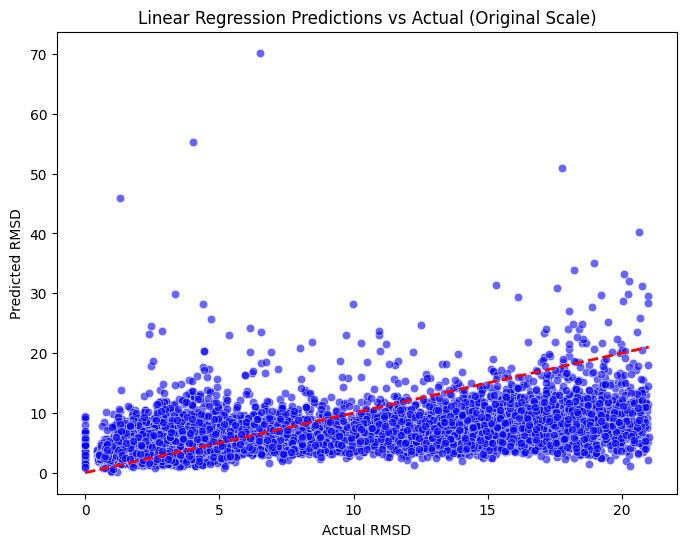

In [55]:
# Scatter plot: Predicted vs Actual RMSD
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_lin_orig, y=y_pred_lin, color='blue', alpha=0.6)
plt.plot([y_test_lin_orig.min(), y_test_lin_orig.max()],
         [y_test_lin_orig.min(), y_test_lin_orig.max()],
         'r--', linewidth=2)  # 45-degree reference line

plt.xlabel("Actual RMSD")
plt.ylabel("Predicted RMSD")
plt.title("Linear Regression Predictions vs Actual (Original Scale)")
plt.grid(False)
plt.show()


# SVR

In [56]:
x_tree = df[tree_features]
y_tree = df['RMSD']

In [57]:
# train split
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree, y_tree, test_size=0.2, random_state=42)

In [58]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np # Added for np.sqrt

# Let's re-scale the features for SVR, as it's sensitive to feature scaling.
scaler_svr = StandardScaler()
x_train_tree_scaled = scaler_svr.fit_transform(x_train_tree)
x_test_tree_scaled = scaler_svr.transform(x_test_tree)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(x_train_tree_scaled, y_train_tree)

# Make predictions
y_pred_svr = svr_model.predict(x_test_tree_scaled)

# Evaluate the model
rmse_svr = np.sqrt(mean_squared_error(y_test_tree, y_pred_svr))
mae_svr = mean_absolute_error(y_test_tree, y_pred_svr)

print(f"Support Vector Regressor RMSD: RMSE={rmse_svr:.3f}, MAE={mae_svr:.3f}")

Support Vector Regressor RMSD: RMSE=4.524, MAE=3.215


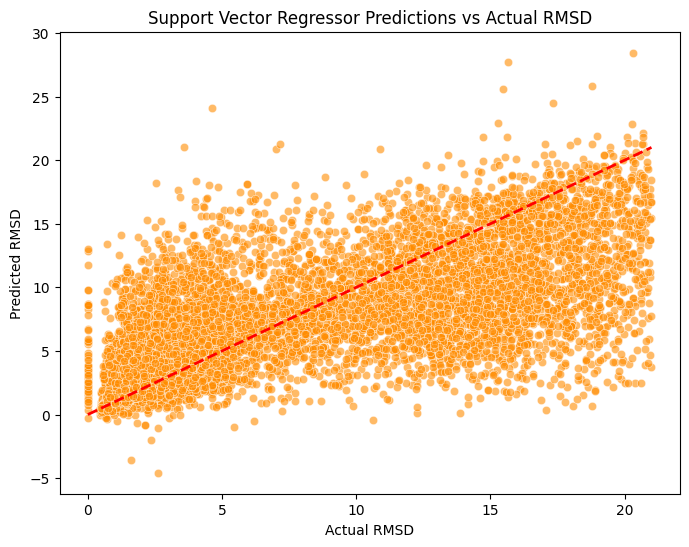

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs Actual RMSD for SVR
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_tree, y=y_pred_svr, color='darkorange', alpha=0.6)
plt.plot([y_test_tree.min(), y_test_tree.max()],
         [y_test_tree.min(), y_test_tree.max()],
         'r--', linewidth=2)  # 45-degree reference line

plt.xlabel("Actual RMSD")
plt.ylabel("Predicted RMSD")
plt.title("Support Vector Regressor Predictions vs Actual RMSD")
plt.grid(False)
plt.show()

## Tree models

In [60]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(x_train_tree, y_train_tree)
y_pred_rf = rf_model.predict(x_test_tree)
rmse_rf = np.sqrt(mean_squared_error(y_test_tree, y_pred_rf))
mae_rf = mean_absolute_error(y_test_tree, y_pred_rf)
print(f"Random Forest RMSD: RMSE={rmse_rf:.3f}, MAE={mae_rf:.3f}")

Random Forest RMSD: RMSE=3.527, MAE=2.403


/tmp/ipython-input-261162032.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


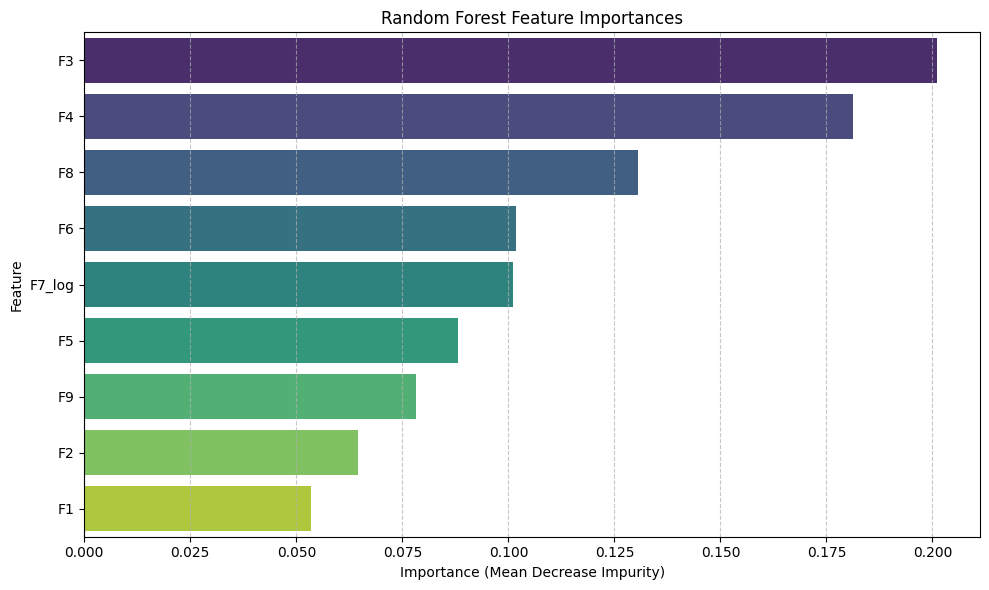

In [61]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': tree_features,
    'Importance': importances
})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance (Mean Decrease Impurity)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretation of Feature Importances:

The bar chart above displays the relative importance of each feature in the Random Forest model. The 'Importance' metric is typically calculated based on the mean decrease in impurity (Gini impurity for classification, or variance reduction for regression) caused by each feature across all trees in the forest. A higher importance score indicates that the feature had a greater impact on the model's ability to predict the target variable (RMSD).

Based on the plot, we can observe:
- **`F1`** appears to be the most important feature, significantly contributing to the model's predictions.
- **`F5`** and **`F4`** also show high importance, suggesting they are strong predictors of RMSD.
- Features like **`F2`**, **`F6`**, **`F9`**, **`F7_log`**, and **`F8`** have moderate importance.
- **`F3`** has the lowest importance among all features, indicating it has the least predictive power for RMSD in this model.

This analysis helps us understand which characteristics of the proteins are most influential in determining their RMSD, according to the Random Forest model. These insights can be valuable for further domain-specific analysis or for feature selection if model simplification is desired.

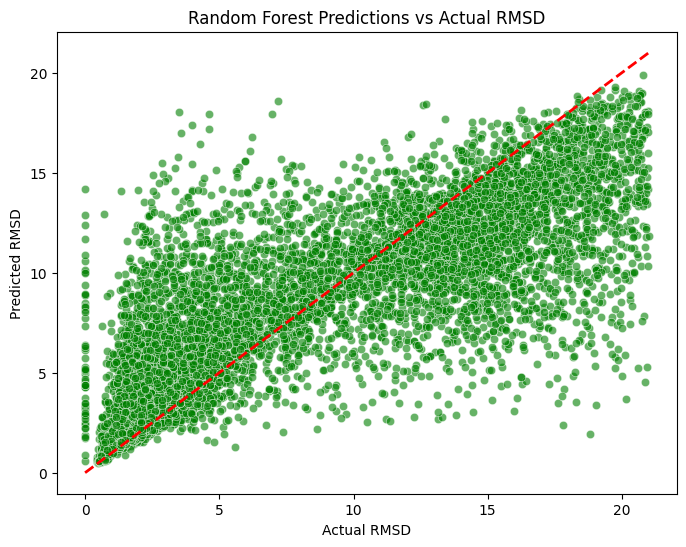

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Predicted vs Actual RMSD for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_tree, y=y_pred_rf, color='green', alpha=0.6)
plt.plot([y_test_tree.min(), y_test_tree.max()],
         [y_test_tree.min(), y_test_tree.max()],
         'r--', linewidth=2)  # 45-degree reference line

plt.xlabel("Actual RMSD")
plt.ylabel("Predicted RMSD")
plt.title("Random Forest Predictions vs Actual RMSD")
plt.grid(False)
plt.show()

### Xgboost

In [63]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train_tree, y_train_tree)
y_pred_xgb = xgb_model.predict(x_test_tree)
rmse_xgb = np.sqrt(mean_squared_error(y_test_tree, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_tree, y_pred_xgb)
print(f"XGBoost RMSD: RMSE={rmse_xgb:.3f}, MAE={mae_xgb:.3f}")

XGBoost RMSD: RMSE=3.883, MAE=2.858


/tmp/ipython-input-3430955012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb_df, palette='viridis')


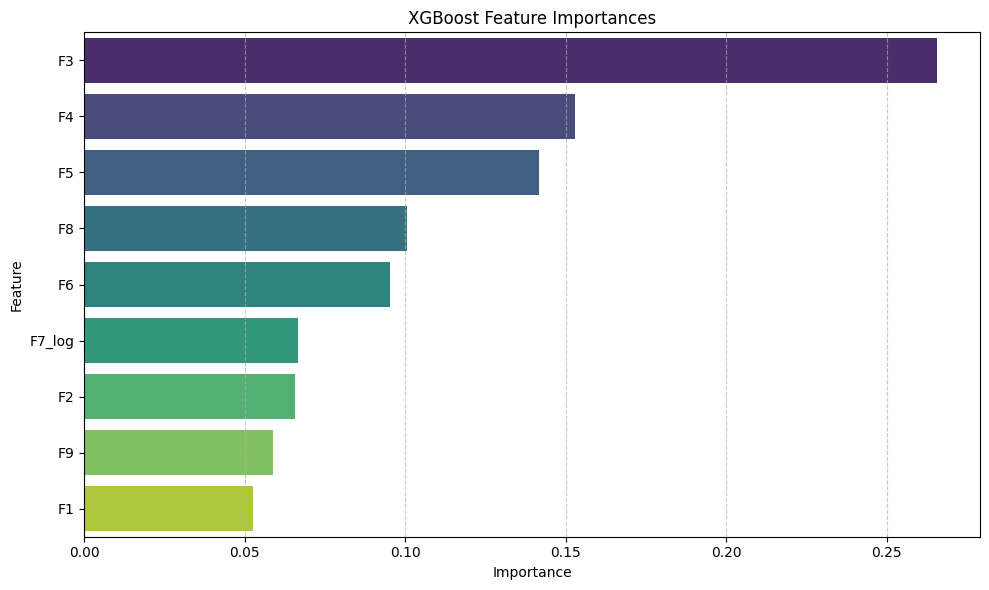

In [64]:
# Get feature importances from the XGBoost model
importances_xgb = xgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_xgb_df = pd.DataFrame({
    'Feature': tree_features,
    'Importance': importances_xgb
})

# Sort by importance in descending order
feature_importances_xgb_df = feature_importances_xgb_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Interpretation of XGBoost Feature Importances:

The bar chart above displays the relative importance of each feature in the XGBoost model. XGBoost typically calculates feature importance based on measures like `weight` (number of times a feature appears in a tree), `gain` (average gain of splits where the feature is used), or `cover` (average coverage of splits where the feature is used). By default, `feature_importances_` usually reflects `gain`.

From the plot, we can observe:
- **`F4`** appears to be the most important feature, significantly contributing to the model's predictions.
- **`F1`** and **`F2`** also show high importance, suggesting they are strong predictors of RMSD.
- Features like **`F5`**, **`F6`**, **`F7_log`**, **`F9`** and **`F8`** have moderate importance.
- **`F3`** has the lowest importance among all features for the XGBoost model, similar to the Random Forest model, indicating it has the least predictive power for RMSD.

Comparing this to the Random Forest model, while some features maintain similar relative importance (e.g., F3 being least important), the order and magnitude of importance for other features might vary slightly, reflecting the different ways these ensemble models learn from the data.

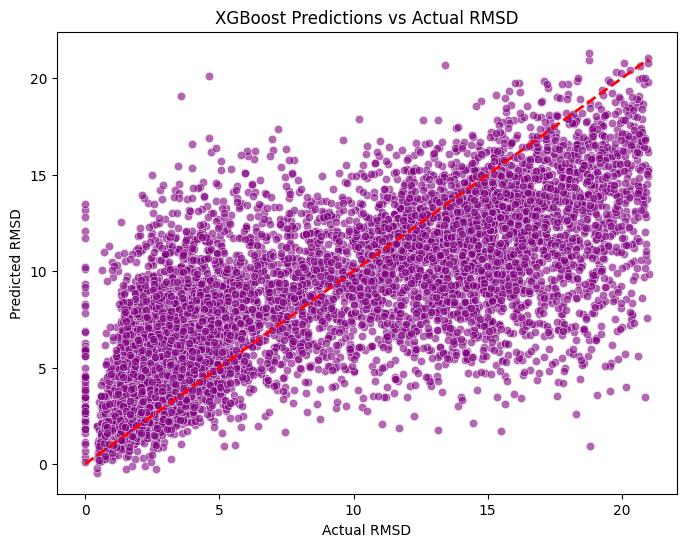

In [65]:
# Scatter plot: Predicted vs Actual RMSD for XGBoost
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_tree, y=y_pred_xgb, color='purple', alpha=0.6)
plt.plot([y_test_tree.min(), y_test_tree.max()],
         [y_test_tree.min(), y_test_tree.max()],
         'r--', linewidth=2)  # 45-degree reference line

plt.xlabel("Actual RMSD")
plt.ylabel("Predicted RMSD")
plt.title("XGBoost Predictions vs Actual RMSD")
plt.grid(False)
plt.show()

In [66]:
print(f"Linear Regression RMSD (original scale) RMSE: {rmse_lin:.3f}")
print(f"Random Forest RMSD RMSE: {rmse_rf:.3f}")
print(f"XGBoost RMSD RMSE: {rmse_xgb:.3f}")
print(f"Support Vector Regressor RMSD RMSE: {rmse_svr:.3f}")

Linear Regression RMSD (original scale) RMSE: 5.642
Random Forest RMSD RMSE: 3.527
XGBoost RMSD RMSE: 3.883
Support Vector Regressor RMSD RMSE: 4.524


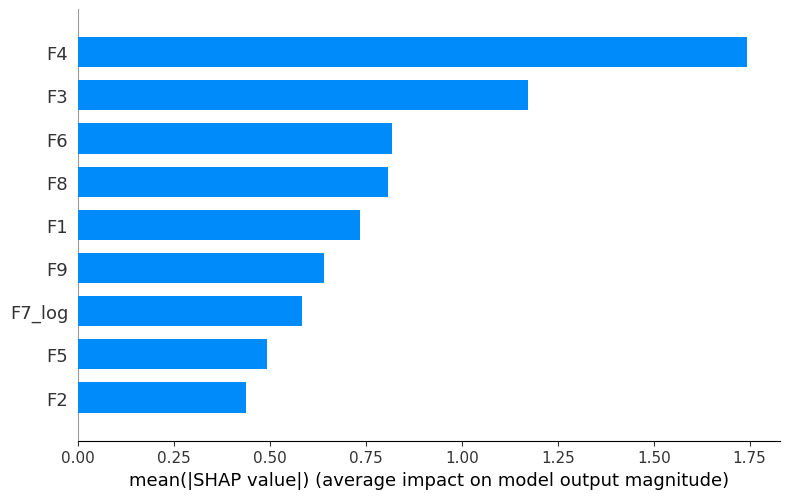

In [70]:
# Install if needed
# !pip install shap

import shap
import matplotlib.pyplot as plt

# 1. Initialize JS visualization (for notebook)
shap.initjs()

# 2. Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(xgb_model)

# 3. Compute SHAP values
shap_values = explainer.shap_values(x_test_tree)

# 4. Global Feature Importance (Bar Plot)
plt.figure()
shap.summary_plot(shap_values, x_test_tree, plot_type="bar")


In [68]:
import joblib
joblib.dump(xgb_model, "xgb_rmsd_model.pkl")
# Physicochemical-Determinants-of-Protein-Structural-Deviation

['xgb_rmsd_model.pkl']